<a href="https://colab.research.google.com/github/dhruvampanchal/basicfacemaskdetection/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MASK DETECTION PROJECT

#Handling the Data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2, os

data_path = '/content/drive/My Drive/dataset'
categories = os.listdir(data_path)
labels = [i for i in range(0, len(categories))]
labels_dict = dict(zip(categories, labels))

In [ ]:
image_size = 100
data = []
label = []
#All the images of the data array will have a label in label array corresponding to the image's index in data array.

for category in categories:
    path = os.path.join(data_path, category)
    image_names = os.listdir(path)
    
    for image_name in image_names:
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path)
        
        #Converting the image to gray scale.
        gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #Resizing the image
        resized_gray_image = cv2.resize(gray_image, (image_size, image_size))
        #Adding the gray scale resized image to the data array.
        data.append(resized_gray_image)
        #Adding the corresponding label for the image to the corresponding index in label array
        label.append(labels_dict[category])

In [ ]:
import numpy as np

#Converting the data in range of 0 to 1 for training the model.
scaled_data = np.array(data)/255.0
#Reshaping the data for training the model.
reshaped_scaled_data = np.reshape(scaled_data, (scaled_data.shape[0], image_size, image_size, 1))
#Converting target array to numpy array
label = np.array(label)

from keras.utils import np_utils
label = np_utils.to_categorical(label)

#Making and training the model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(100, (3, 3), activation = 'relu',input_shape = reshaped_scaled_data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(200, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

Splitting the data.

In [ ]:
print (reshaped_scaled_data)

[[[[0.99607843]
   [0.99607843]
   [0.99215686]
   ...
   [0.63137255]
   [0.6       ]
   [0.61176471]]

  [[0.99607843]
   [0.99607843]
   [0.99607843]
   ...
   [0.62745098]
   [0.61960784]
   [0.6745098 ]]

  [[1.        ]
   [1.        ]
   [0.99215686]
   ...
   [0.56078431]
   [0.56470588]
   [0.64313725]]

  ...

  [[1.        ]
   [1.        ]
   [0.99215686]
   ...
   [0.82745098]
   [0.74901961]
   [0.68627451]]

  [[1.        ]
   [1.        ]
   [0.99215686]
   ...
   [0.56862745]
   [0.6       ]
   [0.60392157]]

  [[1.        ]
   [0.99607843]
   [0.99215686]
   ...
   [0.21176471]
   [0.49411765]
   [0.98039216]]]


 [[[1.        ]
   [1.        ]
   [0.99607843]
   ...
   [0.40392157]
   [0.34901961]
   [0.32941176]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.31764706]
   [0.34901961]
   [0.31372549]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [0.33333333]
   [0.32941176]
   [0.29411765]]

  ...

  [[1.        ]
   [0.99607843]
   [0.9

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(reshaped_scaled_data, label, test_size=0.1)

Fitting the data in the model.

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/dataset/ModelCheckpoints/model-{epoch:02d}.model')
trained_model = model.fit(train_data, train_label, epochs = 20, callbacks=[checkpoint], validation_data=(test_data, test_label))

Train on 1238 samples, validate on 138 samples
Epoch 1/20
1238/1238 [==============================] - 69s 56ms/step - loss: 0.6671 - accuracy: 0.6074 - val_loss: 0.5227 - val_accuracy: 0.7246
Epoch 2/20
1238/1238 [==============================] - 71s 57ms/step - loss: 0.3357 - accuracy: 0.8554 - val_loss: 0.3259 - val_accuracy: 0.8696
Epoch 3/20
1238/1238 [==============================] - 68s 55ms/step - loss: 0.2228 - accuracy: 0.9120 - val_loss: 0.3232 - val_accuracy: 0.8696
Epoch 4/20
1238/1238 [==============================] - 68s 55ms/step - loss: 0.1249 - accuracy: 0.9507 - val_loss: 0.2947 - val_accuracy: 0.8986
Epoch 5/20
1238/1238 [==============================] - 68s 55ms/step - loss: 0.0676 - accuracy: 0.9774 - val_loss: 0.2300 - val_accuracy: 0.9420
Epoch 6/20
1238/1238 [==============================] - 68s 55ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 0.6113 - val_accuracy: 0.8478
Epoch 7/20
1238/1238 [==============================] - 68s 55ms/step - loss:

Plotting the accuracy

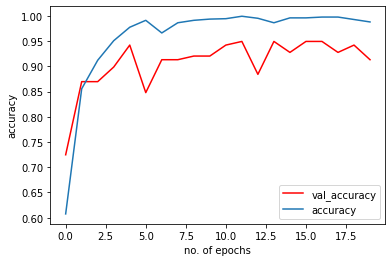

In [ ]:
from matplotlib import pyplot as plt
plt.plot(trained_model.history['val_accuracy'], 'r', label='val_accuracy')
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.xlabel('no. of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
print (max(trained_model.history['val_accuracy']))

0.9492753744125366
